In [54]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

# 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

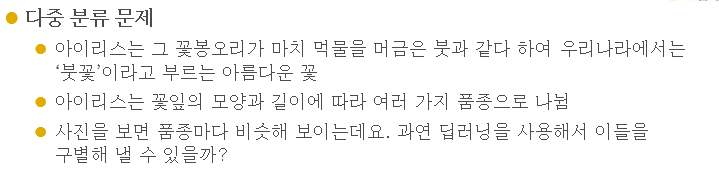

In [67]:
df = pd.read_csv('./data/iris3.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


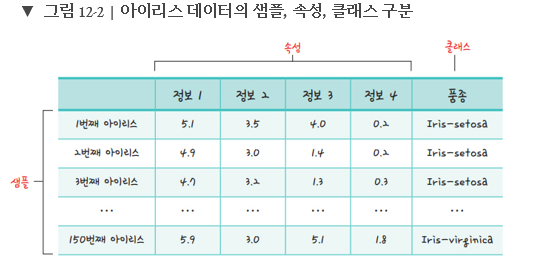

In [68]:
df.shape

(150, 5)

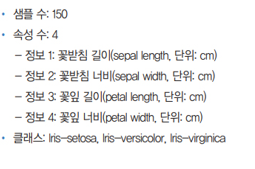

In [69]:
df['species'].unique() # 3개 다중분류 ( 앞에 것들은 이항분류 접근방식이 다름 )

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


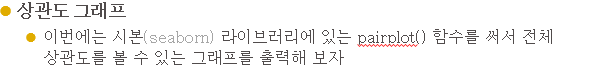

c:\ProgramData\anaconda3\envs\ai2\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


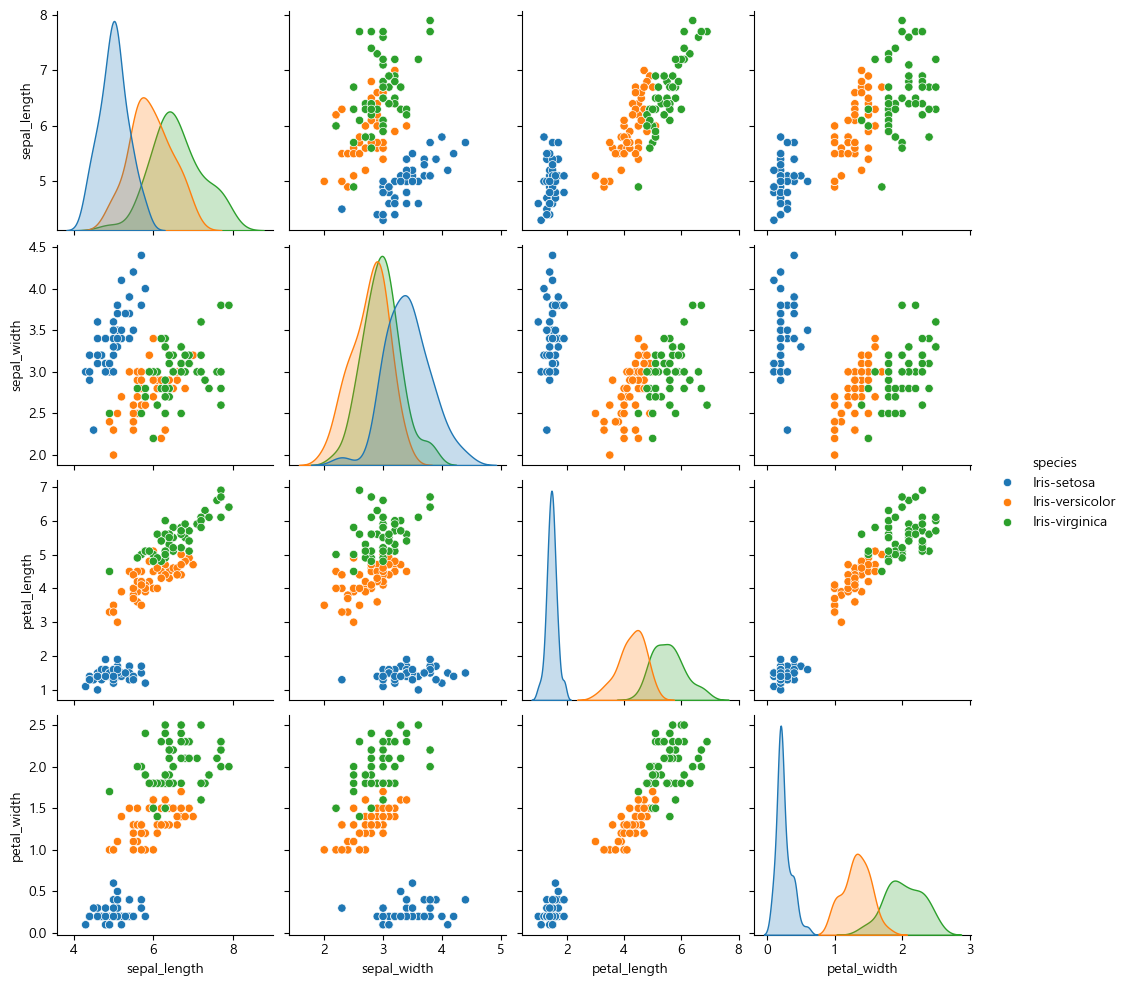

In [71]:
sns.pairplot(df, hue='species')
plt.show()

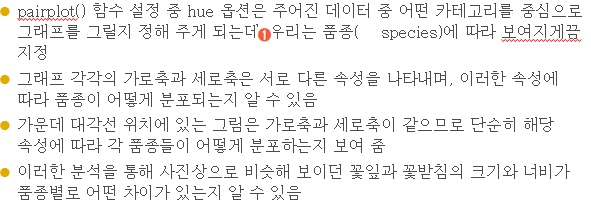

In [72]:
X = df.iloc[0:,0:4] # 컬럼스 인덱스의 숫자로 한다. 
y = df.iloc[:,4]

In [73]:
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


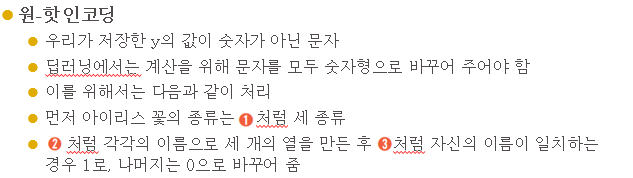

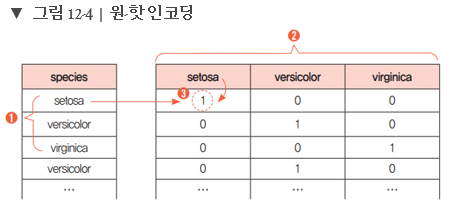

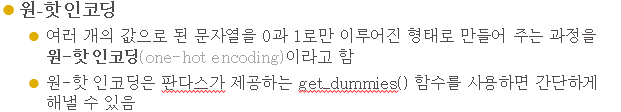

In [74]:
y = pd.get_dummies(y) # 원핫인코딩을 한다. 원핫 인코딩 함수 사용. 판다스에서 제공 
y.head() # 0과 1로 이루어지기 때문에 트루, 펄스로 나옮 펄스는 실패라서 아무것도 없음 0, 트루는 존재하니 1

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [75]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax')) # 종류가 3가지 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                60        
                                                                 
 dense_25 (Dense)            (None, 8)                 104       
                                                                 
 dense_26 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y,epochs=30, batch_size=5)

Epoch 1/30
30/30 [==============================] - 0s 1ms/step - loss: 1.4103 - accuracy: 0.2867 
Epoch 2/30
30/30 [==============================] - 0s 539us/step - loss: 1.1111 - accuracy: 0.3333
Epoch 3/30
30/30 [==============================] - 0s 956us/step - loss: 1.0100 - accuracy: 0.6667
Epoch 4/30
30/30 [==============================] - 0s 758us/step - loss: 0.9554 - accuracy: 0.7267
Epoch 5/30
30/30 [==============================] - 0s 969us/step - loss: 0.9060 - accuracy: 0.8000
Epoch 6/30
30/30 [==============================] - 0s 926us/step - loss: 0.8612 - accuracy: 0.8200
Epoch 7/30
30/30 [==============================] - 0s 658us/step - loss: 0.8197 - accuracy: 0.8533
Epoch 8/30
30/30 [==============================] - 0s 1ms/step - loss: 0.7841 - accuracy: 0.8667
Epoch 9/30
30/30 [==============================] - 0s 539us/step - loss: 0.7503 - accuracy: 0.8933
Epoch 10/30
30/30 [==============================] - 0s 539us/step - loss: 0.7147 - accuracy: 0.8667
Ep

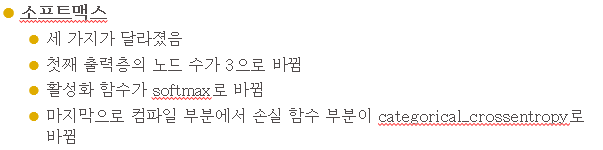

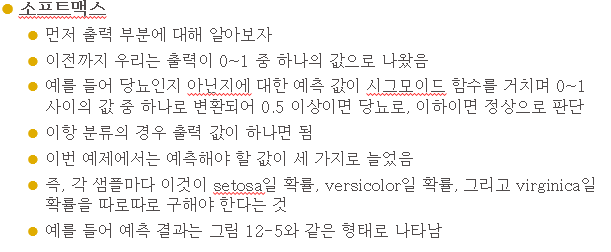

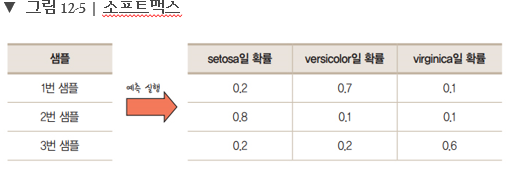

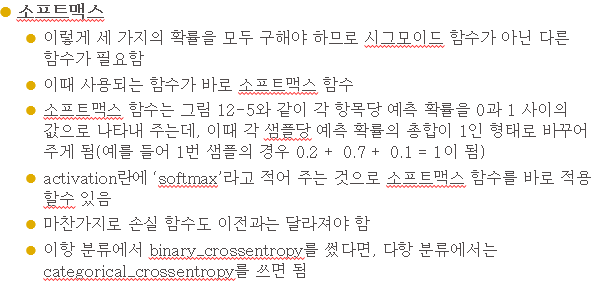

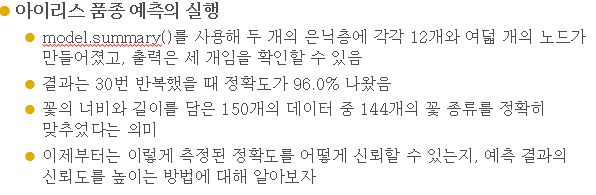